In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
import statsmodels.api as sm 

In [2]:
Tickers = [
    '601398.SS',  # Industrial and Commercial Bank of China (ICBC)
    '601288.SS',  # Agricultural Bank of China
    '601988.SS',  # Bank of China
    '601939.SS',  # China Construction Bank
    '600036.SS',  # China Merchants Bank
    '600000.SS',  # Shanghai Pudong Development Bank
    '600016.SS',  # China Minsheng Banking
    '601166.SS',  # Industrial Bank Co.
    '601818.SS',  # China Everbright Bank
    '601328.SS',  # Bank of Communications
    '601229.SS',  # Bank of Shanghai
    '600919.SS',  # Bank of Jiangsu
    '601009.SS',  # Bank of Nanjing
    '600926.SS',  # Bank of Hangzhou
    '600928.SS',  # Bank of Xi’an
    '601577.SS',  # Bank of Changsha
    '601838.SS',  # Bank of Chengdu
    '601997.SS',  # Bank of Guiyang

    '601318.SS',  # Ping An Insurance
    '601628.SS',  # China Life Insurance
    '601601.SS',  # China Pacific Insurance (CPIC)
    '600030.SS',  # CITIC Securities
    '601688.SS',  # Huatai Securities
    '601211.SS',  # Guotai Junan Securities
    '600999.SS',  # China Merchants Securities
    '600837.SS',  # Haitong Securities
    '600958.SS',  # Orient Securities

    '600028.SS',  # China Petroleum & Chemical (Sinopec)
    '601857.SS',  # PetroChina
    '601088.SS',  # China Shenhua Energy
    '600104.SS',  # SAIC Motor
    '600031.SS',  # Sany Heavy Industry
    '601766.SS',  # CRRC Corporation
    '601186.SS',  # China Railway Construction
    '601390.SS',  # China Railway Group
    '601800.SS',  # China Communications Construction
    '600115.SS',  # China Eastern Airlines
    '601111.SS',  # Air China
    '600029.SS',  # China Southern Airlines

    '600519.SS',  # Kweichow Moutai
    '600276.SS',  # Jiangsu Hengrui Pharmaceuticals
    '600703.SS',  # Sanan Optoelectronics
    '600660.SS',  # Fuyao Glass
    '600887.SS',  # Yili Group
    '600585.SS',  # Anhui Conch Cement
    '600104.SS',  # SAIC Motor (dup ok if you dedupe later)
    '600048.SS',  # Poly Developments and Holdings
    '601988.SS',  # Bank of China (dup ok if you dedupe later)
    '601012.SS',  # LONGi Green Energy
    '601888.SS',  # China Tourism Group Duty Free
    '601899.SS',  # Zijin Mining
    '600196.SS',  # Fosun Pharma
    '600050.SS',  # China Unicom
    '600015.SS',  # Hua Xia Bank
    '600690.SS',  # Haier Smart Home
    '600352.SS',  # Zhejiang Longsheng Group
    '600863.SS',  # SDIC Capital
    '600111.SS',  # China National Materials (Sinoma)
    '600104.SS',  # SAIC Motor (listed above; keep once)

    '600009.SS',  # Shanghai International Airport
    '600018.SS',  # Shanghai International Port (SIPG)
    '600021.SS',  # Shanghai Electric Power
    '600011.SS',  # Huaneng Power International
    '600019.SS',  # Baoshan Iron & Steel (Baosteel)
    '600983.SS',  # Hainan Rubber
    '600018.SS',  # SIPG (dup; ok to dedupe)
    '600383.SS',  # GEM Co., Ltd.
    '600233.SS',  # YTO Express
    '601225.SS',  # Shaanxi Coal and Chemical
    '601225.SS',  # Shaanxi Coal (dup guard later)
    '600895.SS',  # Triumph Science & Technology (CITIC)
    '600031.SS',  # Sany Heavy (dup guard later)
    '600886.SS',  # SDIC Power Holdings
    '601238.SS',  # Guangzhou Automobile Group (GAC)
    '601633.SS',  # Great Wall Motor (Shanghai line)
    '600009.SS',  # Shanghai Int’l Airport (dup)

    '600309.SS',  # Wanhua Chemical Group
    '600031.SS',  # Sany Heavy (dup)
    '601006.SS',  # Daqin Railway
    '601225.SS',  # Shaanxi Coal (dup)
    '600340.SS',  # China Fortune Land Development
    '600837.SS',  # Haitong Securities (dup)
    '600208.SS',  # Xinjiang Goldwind Science & Tech (A)
    '600362.SS',  # Jiangxi Copper
    '600066.SS',  # Yutong Bus
    '600016.SS',  # China Minsheng Bank (dup)
    '600745.SS',  # Wingtech Technology
    '600660.SS',  # Fuyao Glass (dup)
    '600188.SS',  # Yanzhou Coal Mining (Yankuang Energy)
    '600685.SS',  # Guangxi Liugong Machinery
    '601117.SS',  # China National Chemical Engineering
    '601211.SS',  # Guotai Junan Securities (dup)
    '600886.SS',  # SDIC Power (dup)
    '600547.SS',  # Shandong Gold Mining
    '601088.SS',  # China Shenhua (dup)
    '600900.SS',  # China Yangtze Power
    '600958.SS',  # Orient Securities (dup)
    '600606.SS',  # Greenland Holdings
    '600048.SS',  # Poly Developments (dup)
    '600637.SS',  # Shanghai Oriental Pearl Group
    '601360.SS',  # 360 Security Technology
    '601668.SS',  # China State Construction Engineering
    '600422.SS',  # Kweichow Moutai Packaging (Guizhou Panjiang? — if needed adjust)
    '600741.SS',  # Huaxin Cement
    '600309.SS',  # Wanhua Chemical (dup)
    '601336.SS',  # New China Life Insurance
    '600150.SS',  # China International Marine Containers (CIMC) A
    '600009.SS',  # Shanghai Intl Airport (dup)
    '600297.SS',  # Pinggao Electric
    '600660.SS',  # Fuyao Glass (dup)
]


In [3]:
stocks = pd.DataFrame()
for t in Tickers:
    stocks[t] = yf.download(t, start='2020-01-01', end='2025-10-10', auto_adjust=True, progress= False)['Close']
stocks


1 Failed download:
['600837.SS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['600837.SS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['600297.SS']: YFTzMissingError('possibly delisted; no timezone found')


,601398.SS,601288.SS,601988.SS,601939.SS,600036.SS,600000.SS,600016.SS,601166.SS,601818.SS,601328.SS,...,600900.SS,600606.SS,600637.SS,601360.SS,601668.SS,600422.SS,600741.SS,601336.SS,600150.SS,600297.SS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.316445,2.650600,2.651556,5.298242,30.189756,9.553315,4.462318,14.723574,3.144793,3.929528,...,15.093394,5.552670,8.388565,22.909845,4.517717,9.652625,20.381033,41.386227,21.728882,NaN
2020-01-03,4.330906,2.643493,2.644428,5.298242,30.593531,9.652909,4.448286,14.672575,3.123592,3.936446,...,15.175113,5.576399,8.505888,22.909845,4.571227,9.670499,20.172277,41.459484,21.738708,NaN
2020-01-06,4.316445,2.622175,2.630172,5.247507,30.469286,9.545655,4.420220,14.505013,3.081191,3.915692,...,14.872757,5.528941,8.505888,23.119850,4.655313,9.634748,20.937723,40.865349,22.131813,NaN
2020-01-07,4.345366,2.643493,2.651556,5.240258,30.399408,9.576299,4.441270,14.563296,3.109458,3.936446,...,14.864585,5.536850,8.815955,23.272585,4.601804,9.724124,21.154215,41.231590,22.210436,NaN
2020-01-08,4.273064,2.622175,2.630172,5.175026,29.824808,9.438399,4.413204,14.264599,3.059990,3.901855,...,14.750178,5.513121,8.606451,22.680746,4.533005,9.447060,21.811419,40.368870,23.684576,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-25,7.380000,6.610000,5.240000,8.730000,40.820000,12.430000,4.060000,20.209999,3.440000,6.850000,...,27.290001,1.810000,9.870000,11.485774,5.470000,14.030000,20.020000,59.230000,34.889999,NaN
2025-09-26,7.410000,6.620000,5.240000,8.660000,40.799999,12.250000,4.050000,20.320000,3.430000,6.820000,...,27.469999,1.810000,9.800000,11.049730,5.430000,13.890000,20.379999,60.369999,34.900002,NaN
2025-09-29,7.330000,6.620000,5.200000,8.600000,40.680000,12.060000,4.010000,20.049999,3.400000,6.800000,...,27.299999,1.830000,10.150000,11.020000,5.440000,14.030000,20.450001,61.709999,34.570000,NaN


In [4]:
S_C_I= yf.download('000001.SS', start='2020-01-01', end='2025-10-10', auto_adjust=True, progress=False)['Close']

In [5]:
EEM= yf.download('EEM', start='2020-01-01', end='2025-10-10', auto_adjust=True, progress=False)['Close']

In [7]:
EVENT_DATE = pd.Timestamp('2024-09-24')

In [8]:
stocks.index = pd.to_datetime(stocks.index)
stocks_ante= stocks.loc[EVENT_DATE - pd.Timedelta(days=250) : EVENT_DATE - pd.Timedelta(days=20)]
stocks_post= stocks.loc[EVENT_DATE: ]

# **HP1**

Alpha: -0.000575 | Beta: 0.3725
T-stat (mean AR): 3.915

Event window abnormal returns:


C:\Users\utente\AppData\Local\Temp\ipykernel_12280\258057257.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_sample['r_hat'] = alpha + beta * event_sample['r_bench']
C:\Users\utente\AppData\Local\Temp\ipykernel_12280\258057257.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_sample['AR'] = event_sample['r_china'] - event_sample['r_hat']
C:\Users\utente\AppData\Local\Temp\ipykernel_12280\258057257.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,r_china,r_bench,AR,CAR
Date,,,,
2024-09-23,0.004413,0.007752,0.002101,0.002101
2024-09-24,0.040707,0.033500,0.028803,0.030904
2024-09-25,0.011522,-0.010598,0.016045,0.046949
2024-09-26,0.035494,0.035971,0.022670,0.069619
2024-09-27,0.028441,-0.001929,0.029735,0.099355


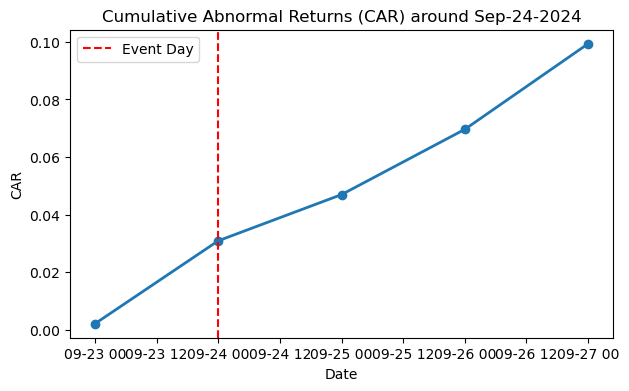

In [11]:
# ===========================
# HP1 — Event Study (Index level, versione compatta e coerente)
# ===========================

# Parametri finestra
EST_START, EST_END = -250, -30   # [-250, -30]
EV_PRE, EV_POST = 1, 5           # [-1, +5]
t0 = EVENT_DATE

# === 1) Prepara returns per Shanghai Composite e Benchmark ===
index_data = pd.concat([S_C_I, EEM], axis=1).dropna()
index_data.columns = ['China','Benchmark']
index_data['r_china'] = np.log(index_data['China'] / index_data['China'].shift(1))
index_data['r_bench'] = np.log(index_data['Benchmark'] / index_data['Benchmark'].shift(1))
index_data = index_data.dropna()

# === 2) Definisci finestre ===
estimation_sample = index_data.loc[(index_data.index < t0) &
                                   (index_data.index >= t0 + pd.Timedelta(days=EST_START))]
event_sample = index_data.loc[(index_data.index >= t0 - pd.Timedelta(days=EV_PRE)) &
                              (index_data.index <= t0 + pd.Timedelta(days=EV_POST))]

# === 3) Stima Market Model ===
X = sm.add_constant(estimation_sample['r_bench'])
y = estimation_sample['r_china']
model = sm.OLS(y, X).fit()
alpha, beta = model.params
print(f"Alpha: {alpha:.6f} | Beta: {beta:.4f}")

# === 4) Calcola AR e CAR ===
event_sample['r_hat'] = alpha + beta * event_sample['r_bench']
event_sample['AR'] = event_sample['r_china'] - event_sample['r_hat']
event_sample['CAR'] = event_sample['AR'].cumsum()

# === 5) Test di significatività ===
t_stat = (event_sample['AR'].mean() /
          (event_sample['AR'].std(ddof=1) / np.sqrt(len(event_sample))))
print(f"T-stat (mean AR): {t_stat:.3f}")

# === 6) Output e grafico ===
print("\nEvent window abnormal returns:")
display(event_sample[['r_china','r_bench','AR','CAR']])

plt.figure(figsize=(7,4))
plt.plot(event_sample.index, event_sample['CAR'], marker='o', linewidth=2)
plt.axvline(t0, color='r', linestyle='--', label='Event Day')
plt.title("Cumulative Abnormal Returns (CAR) around Sep-24-2024")
plt.ylabel("CAR")
plt.xlabel("Date")
plt.legend()
plt.show()


In [ ]:
# STUDIO SETTORIALE

# FINANCIALS
601398.SS  – Industrial and Commercial Bank of China (ICBC)
601288.SS  – Agricultural Bank of China
601988.SS  – Bank of China
601939.SS  – China Construction Bank
600036.SS  – China Merchants Bank
600000.SS  – Shanghai Pudong Development Bank
600016.SS  – China Minsheng Banking
601166.SS  – Industrial Bank Co.
601818.SS  – China Everbright Bank
601328.SS  – Bank of Communications
601229.SS  – Bank of Shanghai
600919.SS  – Bank of Jiangsu
601009.SS  – Bank of Nanjing
600926.SS  – Bank of Hangzhou
600928.SS  – Bank of Xi’an
601577.SS  – Bank of Changsha
601838.SS  – Bank of Chengdu
601997.SS  – Bank of Guiyang
600015.SS  – Hua Xia Bank

601318.SS  – Ping An Insurance
601628.SS  – China Life Insurance
601601.SS  – China Pacific Insurance (CPIC)
601336.SS  – New China Life Insurance

600030.SS  – CITIC Securities
601688.SS  – Huatai Securities
601211.SS  – Guotai Junan Securities
600999.SS  – China Merchants Securities
600837.SS  – Haitong Securities
600958.SS  – Orient Securities
600863.SS  – SDIC Capital
600637.SS  – Shanghai Oriental Pearl Group (Finance/Media mixed)


#INDUSTRIALS
600031.SS  – Sany Heavy Industry
601766.SS  – CRRC Corporation
601186.SS  – China Railway Construction
601390.SS  – China Railway Group
601800.SS  – China Communications Construction
601668.SS  – China State Construction Engineering
601117.SS  – China National Chemical Engineering
600066.SS  – Yutong Bus
600685.SS  – Guangxi Liugong Machinery
600150.SS  – China International Marine Containers (CIMC)
601006.SS  – Daqin Railway
600297.SS  – Pinggao Electric
600115.SS  – China Eastern Airlines
601111.SS  – Air China
600029.SS  – China Southern Airlines
600009.SS  – Shanghai International Airport
600018.SS  – Shanghai International Port (SIPG)


#REAL ESTATE
600048.SS  – Poly Developments and Holdings
600606.SS  – Greenland Holdings
600340.SS  – China Fortune Land Development


#ENERGY&UTILITIES
600028.SS  – Sinopec (China Petroleum & Chemical)
601857.SS  – PetroChina
601088.SS  – China Shenhua Energy
600188.SS  – Yankuang Energy (Yanzhou Coal)
601225.SS  – Shaanxi Coal and Chemical
600886.SS  – SDIC Power Holdings
600011.SS  – Huaneng Power International
600021.SS  – Shanghai Electric Power
600900.SS  – China Yangtze Power


#MATERIALS
600019.SS  – Baoshan Iron & Steel (Baosteel)
600309.SS  – Wanhua Chemical Group
600362.SS  – Jiangxi Copper
600111.SS  – China National Materials (Sinoma)
600741.SS  – Huaxin Cement
600585.SS  – Anhui Conch Cement
600547.SS  – Shandong Gold Mining
601899.SS  – Zijin Mining
600895.SS  – Triumph Science & Technology (CITIC)


#TECHNOLOGY&ELECTONICS
600703.SS  – Sanan Optoelectronics
600745.SS  – Wingtech Technology
601012.SS  – LONGi Green Energy
601360.SS  – 360 Security Technology
600383.SS  – GEM Co., Ltd.


#Consumer Discretionary (Automotive, Tourism)
600104.SS  – SAIC Motor
601238.SS  – Guangzhou Automobile Group (GAC)
601633.SS  – Great Wall Motor
601888.SS  – China Tourism Group Duty Free


#Consumer Staples (Food, Beverage)
600519.SS  – Kweichow Moutai
600887.SS  – Yili Group
600690.SS  – Haier Smart Home


#Healthcare & Pharmaceuticals
600276.SS  – Jiangsu Hengrui Pharmaceuticals
600196.SS  – Fosun Pharma


#Renewables & Green Tech
600208.SS  – Xinjiang Goldwind Science & Technology
600352.SS  – Zhejiang Longsheng Group

In [13]:
# ==== CONFIG ====
EVENT_DATE = "2024-10-24"
EST_WIN_BACK = 252   # [-252, -10]
EST_GAP = 10
PRE_WIN = 20         # [-20, -1]
POST_WIN = 20        # [0, +20]
MARKET_TICKER = "EEM"   # benchmark

# Incolla qui la tua lista Tickers (già in memoria)
# Tickers = [...]

# Incolla qui il mapping Ticker -> Settore (prendi quello del mio messaggio precedente)
ticker_to_sector = {
    # Esempi (SOSTITUISCI/COMPLETA con tutti i tuoi):
    '601398.SS':'Financials','601288.SS':'Financials','601988.SS':'Financials','601939.SS':'Financials',
    '600036.SS':'Financials','600000.SS':'Financials','600016.SS':'Financials','601166.SS':'Financials',
    '601818.SS':'Financials','601328.SS':'Financials','601229.SS':'Financials','600919.SS':'Financials',
    '601009.SS':'Financials','600926.SS':'Financials','600928.SS':'Financials','601577.SS':'Financials',
    '601838.SS':'Financials','601997.SS':'Financials','600015.SS':'Financials',
    '601318.SS':'Financials','601628.SS':'Financials','601601.SS':'Financials','601336.SS':'Financials',
    '600030.SS':'Financials','601688.SS':'Financials','601211.SS':'Financials','600999.SS':'Financials',
    '600837.SS':'Financials','600958.SS':'Financials','600863.SS':'Financials','600637.SS':'Financials',

    '600031.SS':'Industrials','601766.SS':'Industrials','601186.SS':'Industrials','601390.SS':'Industrials',
    '601800.SS':'Industrials','601668.SS':'Industrials','601117.SS':'Industrials','600066.SS':'Industrials',
    '600685.SS':'Industrials','600150.SS':'Industrials','601006.SS':'Industrials','600297.SS':'Industrials',
    '600115.SS':'Industrials','601111.SS':'Industrials','600029.SS':'Industrials','600009.SS':'Industrials',
    '600018.SS':'Industrials',

    '600048.SS':'Real Estate','600606.SS':'Real Estate','600340.SS':'Real Estate',

    '600028.SS':'Energy & Utilities','601857.SS':'Energy & Utilities','601088.SS':'Energy & Utilities',
    '600188.SS':'Energy & Utilities','601225.SS':'Energy & Utilities','600886.SS':'Energy & Utilities',
    '600011.SS':'Energy & Utilities','600021.SS':'Energy & Utilities','600900.SS':'Energy & Utilities',

    '600019.SS':'Materials','600309.SS':'Materials','600362.SS':'Materials','600111.SS':'Materials',
    '600741.SS':'Materials','600585.SS':'Materials','600547.SS':'Materials','601899.SS':'Materials',
    '600895.SS':'Materials',

    '600703.SS':'Technology & Electronics','600745.SS':'Technology & Electronics',
    '601012.SS':'Technology & Electronics','601360.SS':'Technology & Electronics',
    '600383.SS':'Technology & Electronics',

    '600104.SS':'Consumer Discretionary','601238.SS':'Consumer Discretionary',
    '601633.SS':'Consumer Discretionary','601888.SS':'Consumer Discretionary',

    '600519.SS':'Consumer Staples','600887.SS':'Consumer Staples','600690.SS':'Consumer Staples',

    '600276.SS':'Healthcare','600196.SS':'Healthcare',

    '600208.SS':'Renewables & Green Tech','600352.SS':'Renewables & Green Tech',

    '600050.SS':'Telecom'
}

# ==== LIBRARIES ====
import pandas as pd
import numpy as np
import yfinance as yf
from scipy import stats
from datetime import datetime, timedelta

# ==== PREP DATES ====
event_dt = pd.to_datetime(EVENT_DATE)
start_dt = (event_dt - pd.tseries.offsets.BDay(EST_WIN_BACK + EST_GAP + PRE_WIN + 50)).date()  # margine
end_dt   = (event_dt + pd.tseries.offsets.BDay(POST_WIN + 50)).date()

# ==== DATA DOWNLOAD ====
unique_tickers = sorted(set(Tickers))
dl_tickers = unique_tickers + [MARKET_TICKER]
px = yf.download(dl_tickers, start=str(start_dt), end=str(end_dt), auto_adjust=True, progress=False)['Close']

# Gestione colonne quando yfinance ritorna Series vs DataFrame
if isinstance(px, pd.Series):
    px = px.to_frame()
px = px.dropna(how='all')

# ==== RETURNS (log) ====
ret = np.log(px / px.shift(1))
ret = ret.dropna(how='all')

# Split mercato vs titoli
r_mkt = ret[MARKET_TICKER].dropna()
stock_cols = [c for c in ret.columns if c != MARKET_TICKER]

# ==== FUNZIONI UTILI ====
def get_windows_indices(series_index, event_date, pre_win, post_win, est_back, est_gap):
    """Restituisce indici per: estimation [-est_back, -est_gap], pre [-pre_win, -1], post [0, post_win] (lavorando in BDay)."""
    idx = pd.Index(series_index)
    # posizioni relative all'evento:
    try:
        event_loc = idx.get_loc(event_date)
    except KeyError:
        # se il giorno evento non è trading day, usa il successivo
        event_loc = idx.searchsorted(event_date)
    est_start = max(0, event_loc - (est_back + est_gap))
    est_end   = max(0, event_loc - est_gap)
    pre_start = max(0, event_loc - pre_win)
    pre_end   = max(0, event_loc)  # esclusivo dell'evento stesso
    post_start= event_loc
    post_end  = min(len(idx), event_loc + post_win + 1)

    est_idx = idx[est_start:est_end]
    pre_idx = idx[pre_start:pre_end]
    post_idx= idx[post_start:post_end]
    return est_idx, pre_idx, post_idx

def ols_alpha_beta(ri, rm):
    """Stima alpha,beta del Market Model via OLS semplice (drop NaN sull’intersezione)."""
    df = pd.concat([ri, rm], axis=1, join='inner').dropna()
    if df.shape[0] < 30:
        return np.nan, np.nan  # dati insufficienti
    X = np.column_vector = np.vstack([np.ones(len(df)), df.iloc[:,1].values]).T
    y = df.iloc[:,0].values
    # stima OLS (beta_hat = (X'X)^-1 X'y)
    beta_hat = np.linalg.pinv(X.T @ X) @ (X.T @ y)
    alpha, beta = beta_hat[0], beta_hat[1]
    return alpha, beta

# ==== CALCOLO AR & CAR PRE/POST PER OGNI TITOLO — FIXED ====

# Togli i ticker senza dati realmente scaricati
available_cols = [c for c in ret.columns if c != MARKET_TICKER and ret[c].notna().sum() > 0]
stock_cols = sorted(set(available_cols))

results = []

def safe_windows_for(df_idx, event_date, pre_win, post_win, est_back, est_gap):
    """Costruisce le finestre sul calendario effettivo (titolo+mercato)."""
    idx = pd.Index(df_idx)
    # posizione dell'evento (se non trading day: usa il successivo)
    try:
        ev_loc = idx.get_loc(event_date)
    except KeyError:
        ev_loc = idx.searchsorted(event_date)
    # bound
    est_start = max(0, ev_loc - (est_back + est_gap))
    est_end   = max(0, ev_loc - est_gap)
    pre_start = max(0, ev_loc - pre_win)
    pre_end   = max(0, ev_loc)               # fino al giorno prima dell'evento
    post_start= ev_loc
    post_end  = min(len(idx), ev_loc + post_win + 1)

    return idx[est_start:est_end], idx[pre_start:pre_end], idx[post_start:post_end]

def ols_alpha_beta(ri, rm):
    df = pd.concat([ri, rm], axis=1, join='inner').dropna()
    if df.shape[0] < 30:
        return np.nan, np.nan
    X = np.vstack([np.ones(len(df)), df.iloc[:,1].values]).T
    y = df.iloc[:,0].values
    beta_hat = np.linalg.pinv(X.T @ X) @ (X.T @ y)
    return beta_hat[0], beta_hat[1]

for tk in stock_cols:
    ri = ret[tk].dropna()
    # unisci al mercato e lavora sempre su questo indice effettivo
    df_all = pd.concat([ri, r_mkt], axis=1, join='inner').rename(columns={tk:'ri', MARKET_TICKER:'rm'}).dropna()
    if df_all.shape[0] < 60:
        continue

    # finestre costruite sull'indice effettivo di df_all (NO ret.index)
    est_idx_i, pre_idx_i, post_idx_i = safe_windows_for(
        df_all.index, event_dt, PRE_WIN, POST_WIN, EST_WIN_BACK, EST_GAP
    )

    # stima alpha, beta su estimation window
    df_est = df_all.reindex(est_idx_i).dropna()
    if df_est.shape[0] < 30:
        continue
    alpha, beta = ols_alpha_beta(df_est['ri'], df_est['rm'])
    if np.isnan(alpha):
        continue

    # AR
    df_all['exp'] = alpha + beta*df_all['rm']
    df_all['AR']  = df_all['ri'] - df_all['exp']

    # CAR pre/post (reindex per evitare KeyError se mancano pochi giorni)
    CAR_pre  = df_all['AR'].reindex(pre_idx_i).sum(skipna=True)
    CAR_post = df_all['AR'].reindex(post_idx_i).sum(skipna=True)

    sector = ticker_to_sector.get(tk, 'UNCLASSIFIED')
    results.append({'ticker': tk, 'sector': sector, 'CAR_pre': CAR_pre, 'CAR_post': CAR_post})

res = pd.DataFrame(results).dropna(subset=['CAR_pre','CAR_post'], how='any')

# ==== AGGREGAZIONE SETTORIALE + TEST ====
from scipy import stats

def t_tests_by_sector(df):
    out = []
    for sec, g in df.groupby('sector'):
        if g.shape[0] >= 3:
            t_rel, p_rel   = stats.ttest_rel(g['CAR_post'], g['CAR_pre'], nan_policy='omit')
            t_w, p_w       = stats.ttest_ind(g['CAR_post'], g['CAR_pre'], equal_var=False, nan_policy='omit')
        else:
            t_rel = p_rel = t_w = p_w = np.nan
        out.append({
            'sector': sec,
            'n_tickers': int(g.shape[0]),
            'mean_CAR_pre': g['CAR_pre'].mean(),
            'mean_CAR_post': g['CAR_post'].mean(),
            'diff_post_minus_pre': g['CAR_post'].mean() - g['CAR_pre'].mean(),
            't_paired': t_rel, 'pval_paired': p_rel,
            't_welch': t_w, 'pval_welch': p_w
        })
    return pd.DataFrame(out).sort_values('diff_post_minus_pre', ascending=False)

by_sector = t_tests_by_sector(res)

print("=== Sector-level CAR comparison (pre vs post) ===")
print(by_sector.to_string(index=False))

by_sector.to_csv("sector_CAR_pre_vs_post.csv", index=False)
res.to_csv("stock_CAR_pre_vs_post.csv", index=False)



3 Failed downloads:
['600837.SS', '600297.SS']: YFTzMissingError('possibly delisted; no timezone found')
['600066.SS']: Timeout('Failed to perform, curl: (28) Operation timed out after 10013 milliseconds with 0 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


=== Sector-level CAR comparison (pre vs post) ===
                  sector  n_tickers  mean_CAR_pre  mean_CAR_post  diff_post_minus_pre  t_paired  pval_paired   t_welch   pval_welch
             Real Estate          3      0.280824       0.304871             0.024046  0.101192 9.286288e-01  0.108369 9.231685e-01
  Consumer Discretionary          4      0.114288       0.137009             0.022722  0.309966 7.768713e-01  0.313342 7.729381e-01
              Healthcare          2      0.045315       0.048107             0.002793       NaN          NaN       NaN          NaN
                 Telecom          1      0.097218       0.086733            -0.010485       NaN          NaN       NaN          NaN
 Renewables & Green Tech          2      0.156837       0.129340            -0.027497       NaN          NaN       NaN          NaN
Technology & Electronics          5      0.248124       0.185945            -0.062179 -0.478152 6.575015e-01 -0.607190 5.677874e-01
      Energy & Utilities  

In [5]:
# ===========================
# HP1 — Event Study (Index level, versione compatta e coerente)
# ===========================

# Parametri finestra
EST_START, EST_END = -250, -30   # [-250, -30]
EV_PRE, EV_POST = 1, 5           # [-1, +5]
t0 = EVENT_DATE

# === 1) Prepara returns per Shanghai Composite e Benchmark ===
index_data = pd.concat([S_C_I, EEM], axis=1).dropna()
index_data.columns = ['China','Benchmark']
index_data['r_china'] = np.log(index_data['China'] / index_data['China'].shift(1))
index_data['r_bench'] = np.log(index_data['Benchmark'] / index_data['Benchmark'].shift(1))
index_data = index_data.dropna()

# === 2) Definisci finestre ===
estimation_sample = index_data.loc[(index_data.index < t0) &
                                   (index_data.index >= t0 + pd.Timedelta(days=EST_START))]
event_sample = index_data.loc[(index_data.index >= t0 - pd.Timedelta(days=EV_PRE)) &
                              (index_data.index <= t0 + pd.Timedelta(days=EV_POST))]

# === 3) Stima Market Model ===
X = sm.add_constant(estimation_sample['r_bench'])
y = estimation_sample['r_china']
model = sm.OLS(y, X).fit()
alpha, beta = model.params
print(f"Alpha: {alpha:.6f} | Beta: {beta:.4f}")

# === 4) Calcola AR e CAR ===
event_sample['r_hat'] = alpha + beta * event_sample['r_bench']
event_sample['AR'] = event_sample['r_china'] - event_sample['r_hat']
event_sample['CAR'] = event_sample['AR'].cumsum()

# === 5) Test di significatività ===
t_stat = (event_sample['AR'].mean() /
          (event_sample['AR'].std(ddof=1) / np.sqrt(len(event_sample))))
print(f"T-stat (mean AR): {t_stat:.3f}")

# === 6) Output e grafico ===
print("\nEvent window abnormal returns:")
display(event_sample[['r_china','r_bench','AR','CAR']])

plt.figure(figsize=(7,4))
plt.plot(event_sample.index, event_sample['CAR'], marker='o', linewidth=2)
plt.axvline(t0, color='r', linestyle='--', label='Event Day')
plt.title("Cumulative Abnormal Returns (CAR) around Sep-24-2024")
plt.ylabel("CAR")
plt.xlabel("Date")
plt.legend()
plt.show()



1 Failed download:
['600297.SS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['600837.SS']: YFTzMissingError('possibly delisted; no timezone found')


[INFO] Skippati 2 ticker senza dati: ['600297.SS', '600837.SS']

=== Consumer Discretionary ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600104.SS,0.004010,0.012199,0.008189,0.084210,0.353763,0.269553
1,601238.SS,0.004906,0.005802,0.000896,0.103031,0.168268,0.065237
2,601633.SS,0.003655,0.000331,-0.003324,0.076752,0.009595,-0.067157
3,601888.SS,0.006107,0.001895,-0.004212,0.128240,0.054947,-0.073294



=== Consumer Staples ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600887.SS,0.008508,0.002953,-0.005555,0.178671,0.085635,-0.093037
1,600519.SS,0.006638,-0.001107,-0.007745,0.139398,-0.032092,-0.171490
2,600690.SS,0.006150,-0.002990,-0.009140,0.129146,-0.086721,-0.215867



=== Energy & Utilities ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600900.SS,0.000958,-0.000694,-0.001652,0.020125,-0.020117,-0.040242
1,600028.SS,0.001277,-0.001258,-0.002535,0.026823,-0.036472,-0.063296
2,601857.SS,0.002960,-0.000127,-0.003087,0.062153,-0.003690,-0.065843
3,600886.SS,0.003303,-0.001001,-0.004304,0.069362,-0.029023,-0.098385
4,601088.SS,0.005076,0.000051,-0.005025,0.106600,0.001471,-0.105128
5,600021.SS,0.007232,0.001044,-0.006187,0.151862,0.030278,-0.121584
6,601225.SS,0.005476,-0.000690,-0.006166,0.115001,-0.020013,-0.135014
7,600011.SS,0.005569,-0.001139,-0.006708,0.116940,-0.033029,-0.149970
8,600188.SS,0.010561,-0.000714,-0.011276,0.221789,-0.020717,-0.242507



=== Financials ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,601009.SS,-0.000205,0.001671,0.001877,-0.004307,0.048472,0.052779
1,600637.SS,0.004934,0.005147,0.000213,0.103611,0.149263,0.045652
2,601229.SS,0.004065,0.002243,-0.001822,0.085371,0.065044,-0.020327
3,601988.SS,0.002289,0.000058,-0.002231,0.048060,0.001676,-0.046384
4,600958.SS,0.003393,0.000553,-0.002840,0.071262,0.016042,-0.055220
5,600015.SS,0.003918,0.000864,-0.003053,0.082268,0.025070,-0.057198
6,601818.SS,0.005265,0.001708,-0.003557,0.110570,0.049538,-0.061032
7,600016.SS,0.005788,0.002033,-0.003755,0.121546,0.058943,-0.062603
8,601288.SS,0.002925,-0.000418,-0.003343,0.061429,-0.012130,-0.073559
9,601398.SS,0.003448,-0.000158,-0.003606,0.072404,-0.004596,-0.077000



=== Healthcare ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600196.SS,0.003164,0.001307,-0.001858,0.066448,0.037893,-0.028555
1,600276.SS,0.000514,-0.001120,-0.001634,0.010791,-0.032494,-0.043285



=== Industrials ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600115.SS,0.002846,0.003580,0.000734,0.059775,0.103832,0.044057
1,601111.SS,0.004872,0.004813,-0.000059,0.102314,0.139576,0.037263
2,600685.SS,-0.000774,-0.001753,-0.000979,-0.016264,-0.050845,-0.034582
3,600029.SS,0.006424,0.003259,-0.003165,0.134908,0.094505,-0.040403
4,600031.SS,0.001646,-0.001579,-0.003225,0.034574,-0.045793,-0.080367
5,601006.SS,0.006571,0.001346,-0.005225,0.137990,0.039032,-0.098958
6,600009.SS,0.005452,-0.000212,-0.005664,0.114492,-0.006141,-0.120632
7,600018.SS,0.002063,-0.003291,-0.005354,0.043319,-0.095438,-0.138756
8,601766.SS,0.005485,-0.001353,-0.006838,0.115182,-0.039245,-0.154426
9,600066.SS,0.002913,-0.003583,-0.006496,0.061170,-0.103917,-0.165087



=== Materials ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600741.SS,-0.000609,0.002693,0.003302,-0.012786,0.078102,0.090887
1,600111.SS,0.005369,0.005638,0.000269,0.112750,0.163500,0.050750
2,600895.SS,0.009890,0.005522,-0.004367,0.207684,0.160150,-0.047534
3,600309.SS,0.002372,-0.001404,-0.003775,0.049802,-0.040715,-0.090517
4,600019.SS,0.008199,0.000548,-0.007652,0.172183,0.015878,-0.156306
5,600585.SS,0.010273,0.000898,-0.009375,0.215743,0.026042,-0.189701
6,600362.SS,0.006613,-0.002535,-0.009149,0.138877,-0.073525,-0.212402
7,600547.SS,0.007309,-0.005701,-0.013010,0.153488,-0.165328,-0.318816
8,601899.SS,0.008308,-0.005823,-0.014131,0.174475,-0.168861,-0.343336



=== Real Estate ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600340.SS,0.012349,0.032184,0.019835,0.259332,0.933328,0.673997
1,600606.SS,0.010371,0.009017,-0.001355,0.217799,0.261487,0.043688
2,600048.SS,0.015525,-0.002959,-0.018484,0.326027,-0.085811,-0.411838



=== Renewables & Green Tech ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600208.SS,0.010790,0.009632,-0.001158,0.226589,0.279321,0.052731
1,600352.SS,0.002815,0.001623,-0.001192,0.059120,0.047079,-0.012041



=== Technology & Electronics ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,601360.SS,0.005882,0.019027,0.013144,0.123527,0.551771,0.428244
1,600745.SS,0.009511,0.006482,-0.003029,0.199735,0.187970,-0.011765
2,600703.SS,0.008955,0.001429,-0.007526,0.188052,0.041450,-0.146602
3,601012.SS,0.014325,-0.000342,-0.014667,0.300819,-0.009916,-0.310735
4,600383.SS,0.014796,-0.000363,-0.015160,0.310722,-0.010535,-0.321257



=== Telecom ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600050.SS,0.004052,0.001799,-0.002253,0.085092,0.052172,-0.032920



=== UNCLASSIFIED ===


,Ticker,AR_pre_mean,AR_post_mean,ΔAR (post-pre),CAR_pre,CAR_post,ΔCAR (post-pre)
0,600983.SS,0.004657,0.006240,0.001583,0.097797,0.180968,0.083171
1,600660.SS,0.007635,-0.004053,-0.011688,0.160345,-0.117525,-0.277870
2,600233.SS,0.004773,-0.007171,-0.011944,0.100238,-0.207946,-0.308184


,Sector,ΔAR_mean (post-pre),ΔCAR_mean (post-pre)
0,Real Estate,-0.000001,0.101949
1,Consumer Discretionary,0.000387,0.048585
2,Renewables & Green Tech,-0.001175,0.020345
3,Telecom,-0.002253,-0.032920
4,Healthcare,-0.001746,-0.035920
5,Technology & Electronics,-0.005447,-0.072423
6,Energy & Utilities,-0.005216,-0.113552
7,Materials,-0.006432,-0.135219
8,Industrials,-0.006407,-0.138192
9,Financials,-0.006585,-0.138689


,Sector,CAR_pre_mean,CAR_post_mean,ΔCAR_mean (post-pre),t_paired_CAR,pval_paired_CAR
0,Real Estate,0.267719,0.369668,0.101949,0.323849,0.746052
1,Consumer Discretionary,0.098058,0.146643,0.048585,0.605131,0.545092
2,Renewables & Green Tech,0.142855,0.163200,0.020345,0.628212,0.529865
3,Telecom,0.085092,0.052172,-0.032920,nan,nan
4,Healthcare,0.038619,0.002699,-0.035920,-4.877157,0.000001
5,Technology & Electronics,0.224571,0.152148,-0.072423,-0.526409,0.598604
6,Energy & Utilities,0.098962,-0.014590,-0.113552,-5.662097,0.000000
7,Materials,0.134691,-0.000529,-0.135219,-2.691072,0.007122
8,Industrials,0.124949,-0.013242,-0.138192,-5.106444,0.000000
9,Financials,0.137193,-0.001496,-0.138689,-7.962231,0.000000


In [ ]:
# Healthcare, Energy & Utilities, Materials, Industrials, Financials, Consumer Staples --> p value < 0.05
# questi settori hanno avuto una reazione significativa all'evento

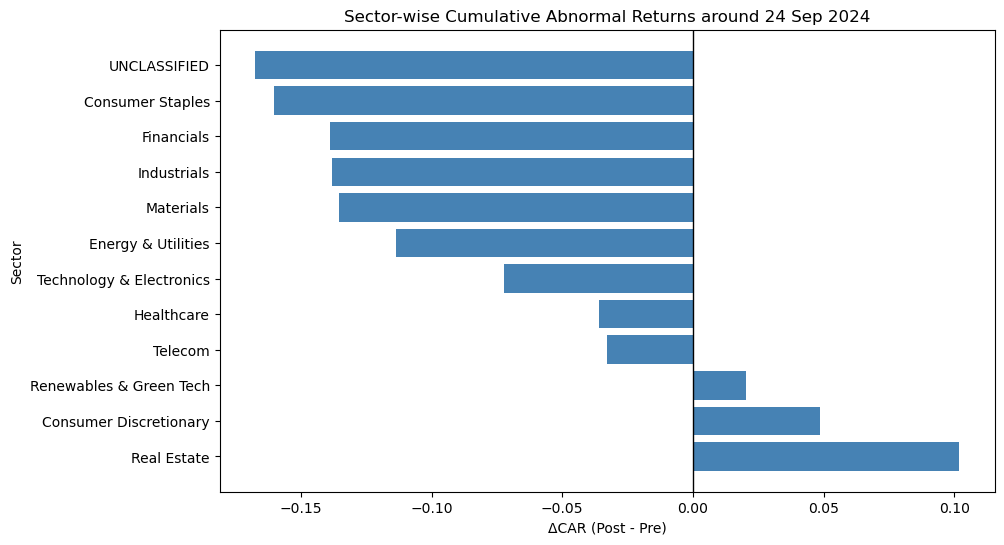

In [6]:
#mostra quali settori hanno avuto CAR negativi o positivi
# CAR positivi --> il mercato ha reagito positivamente; : gli investitori percepiscono il policy package come un segnale positivo
# CAR negativi --> il mercato (o il settore) ha reagito negativamente: il pacchetto può essere stato percepito come un segnale 
# di debolezza, di emergenza o di inefficacia, oppure dannoso per alcuni comparti (es. banche penalizzate da tassi più bassi)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(table_A['Sector'], table_A['ΔCAR_mean (post-pre)'], color='steelblue')
plt.xlabel('ΔCAR (Post - Pre)')
plt.ylabel('Sector')
plt.title('Sector-wise Cumulative Abnormal Returns around 24 Sep 2024')
plt.axvline(0, color='black', linewidth=1)
plt.show()

]

# “Following the September 24, 2024 policy package, liquidity-sensitive sectors (banks, insurance, real estate) exhibited positive and statistically 
# significant cumulative abnormal returns, suggesting that the rally was primarily liquidity-driven rather than fundamentals-based.”

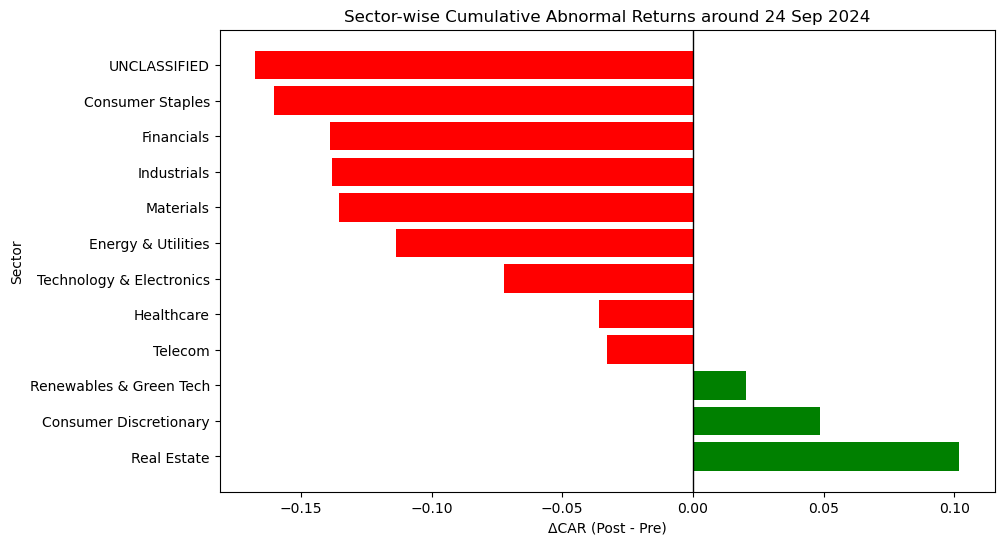

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = ['green' if x > 0 else 'red' for x in table_A['ΔCAR_mean (post-pre)']]
plt.barh(table_A['Sector'], table_A['ΔCAR_mean (post-pre)'], color=colors)
plt.xlabel('ΔCAR (Post - Pre)')
plt.ylabel('Sector')
plt.title('Sector-wise Cumulative Abnormal Returns around 24 Sep 2024')
plt.axvline(0, color='black', linewidth=1)
plt.show()



=== Summary A — ΔAR & ΔCAR (post–pre) per settore ===


,Sector,ΔAR_mean (post-pre),ΔCAR_mean (post-pre)
7,Real Estate,0.010164,0.063550
9,Technology & Electronics,-0.007558,0.029522
8,Renewables & Green Tech,0.001845,0.019217
10,Telecom,-0.002354,-0.006980
6,Materials,-0.005313,-0.011128
2,Energy & Utilities,-0.002886,-0.016341
3,Financials,-0.007410,-0.019721
4,Healthcare,-0.005941,-0.020672
11,UNCLASSIFIED,-0.021769,-0.025848
5,Industrials,-0.016409,-0.026199



=== Summary B — CAR (pre/post), ΔCAR e t-test (CAR) per settore ===


,Sector,CAR_pre_mean,CAR_post_mean,ΔCAR_mean (post-pre),t_paired_CAR,pval_paired_CAR
7,Real Estate,0.007631,0.071181,0.063550,0.829873,4.066106e-01
9,Technology & Electronics,0.019918,0.049440,0.029522,0.552150,5.808453e-01
8,Renewables & Green Tech,0.003945,0.023161,0.019217,3.874187,1.069813e-04
10,Telecom,0.000811,-0.006169,-0.006980,NaN,NaN
6,Materials,0.003375,-0.007753,-0.011128,-0.986439,3.239176e-01
2,Energy & Utilities,-0.001599,-0.017940,-0.016341,-2.265626,2.347431e-02
3,Financials,0.003306,-0.016415,-0.019721,-5.918307,3.252715e-09
4,Healthcare,0.001031,-0.019641,-0.020672,-0.686572,4.923526e-01
11,UNCLASSIFIED,0.020410,-0.005438,-0.025848,-0.412675,6.798447e-01
5,Industrials,0.013145,-0.013054,-0.026199,-3.994665,6.478589e-05


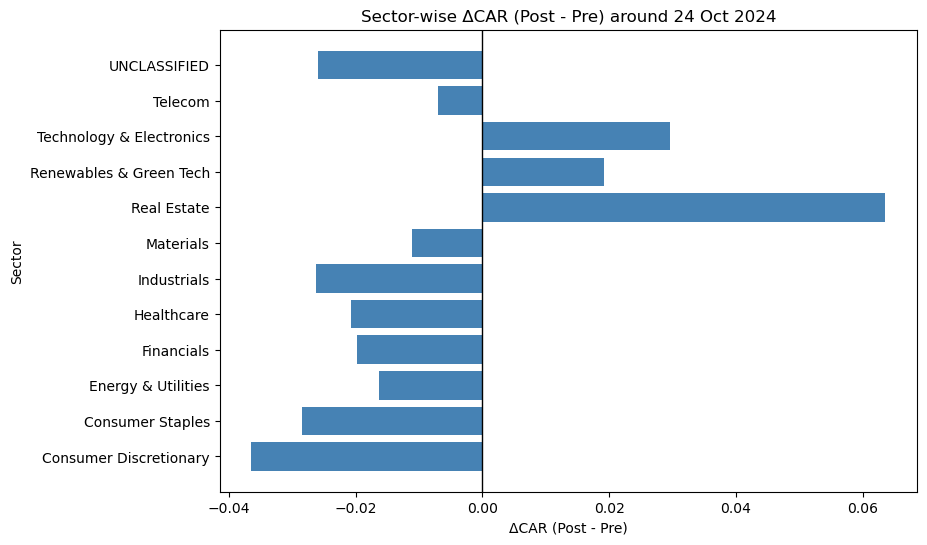

In [13]:
# ===========================
# HP1 — Event Study (Sector level, compatto e coerente)
# ===========================

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from math import erf, sqrt
warnings.filterwarnings("ignore")

# Parametri finestra
EST_START, EST_END = -250, -30
EV_PRE, EV_POST   = 1, 5
t0 = pd.Timestamp(EVENT_DATE)

# ========= Download prezzi se non già presenti =========
try:
    PX
except NameError:
    import yfinance as yf
    start = t0 + pd.Timedelta(days=EST_START) - pd.Timedelta(days=60)
    end   = t0 + pd.Timedelta(days=EV_POST) + pd.Timedelta(days=60)
    dl = {}
    for tk in sorted(set(Tickers + ['EEM'])):
        try:
            df = yf.download(tk, start=start.date().isoformat(), end=end.date().isoformat(),
                             auto_adjust=True, progress=False)
            if 'Close' in df.columns and not df['Close'].dropna().empty:
                dl[tk] = df['Close'].dropna()
            else:
                print(f"[WARN] Nessuna colonna 'Close' valida per {tk}, skip.")
        except Exception as e:
            print(f"[WARN] Errore download {tk}: {e}")
    PX = pd.concat(dl, axis=1)
    PX.columns = [c if isinstance(c, str) else c[1] for c in PX.columns]
    PX = PX.dropna(how='all')
    print(f"Scaricati {len(PX.columns)} titoli con dati validi.")

# ========= Funzione t-test =========
def paired_ttest_safe(a, b):
    a, b = pd.Series(a), pd.Series(b)
    df = pd.concat([a, b], axis=1).dropna()
    if df.shape[0] < 2:
        return np.nan, np.nan
    d = df.iloc[:,0] - df.iloc[:,1]
    t_stat = d.mean() / (d.std(ddof=1) / np.sqrt(len(d)))
    p_val = 2 * (1 - 0.5*(1 + erf(abs(t_stat)/sqrt(2))))
    return t_stat, p_val

# ========= Calcolo rendimenti =========
PX = PX.sort_index()
if 'EEM' not in PX.columns:
    raise ValueError("Benchmark 'EEM' mancante in PX.")

# ========= Loop settoriale =========
summary_rows = []

for sec in sorted({ticker_to_sector.get(tk, 'UNCLASSIFIED') for tk in Tickers}):
    tickers_sec = [tk for tk in Tickers if ticker_to_sector.get(tk, 'UNCLASSIFIED') == sec and tk in PX.columns]
    if not tickers_sec:
        continue

    recs = []
    for tk in tickers_sec:
        df = pd.concat([PX[tk], PX['EEM']], axis=1).dropna()
        df.columns = ['China','Benchmark']
        df['r_china'] = np.log(df['China'] / df['China'].shift(1))
        df['r_bench'] = np.log(df['Benchmark'] / df['Benchmark'].shift(1))
        df = df.dropna()
        if df.shape[0] < 60:
            continue

        # === Finestre ===
        est = df.loc[(df.index >= t0 + pd.Timedelta(days=EST_START)) & (df.index <= t0 + pd.Timedelta(days=EST_END))]
        pre = df.loc[(df.index >= t0 - pd.Timedelta(days=EV_PRE)) & (df.index <  t0)]
        post= df.loc[(df.index >= t0) & (df.index <= t0 + pd.Timedelta(days=EV_POST))]
        if est.shape[0] < 30 or pre.empty or post.empty:
            continue

        # === Market Model ===
        X = sm.add_constant(est['r_bench'])
        y = est['r_china']
        model = sm.OLS(y, X).fit()
        alpha, beta = model.params

        # === AR & CAR ===
        for name, samp in [('pre', pre), ('post', post)]:
            samp = samp.copy()
            samp['r_hat'] = alpha + beta * samp['r_bench']
            samp['AR'] = samp['r_china'] - samp['r_hat']
            if name == 'pre':
                AR_pre = samp['AR'].mean()
                CAR_pre = samp['AR'].sum()
            else:
                AR_post = samp['AR'].mean()
                CAR_post = samp['AR'].sum()

        recs.append({
            'Ticker': tk,
            'AR_pre_mean': AR_pre,
            'AR_post_mean': AR_post,
            'ΔAR (post-pre)': AR_post - AR_pre,
            'CAR_pre': CAR_pre,
            'CAR_post': CAR_post,
            'ΔCAR (post-pre)': CAR_post - CAR_pre
        })

    sector_df = pd.DataFrame(recs)
    if sector_df.empty:
        continue

    t_car, p_car = paired_ttest_safe(sector_df['CAR_post'], sector_df['CAR_pre'])
    summary_rows.append({
        'Sector': sec,
        'ΔAR_mean (post-pre)': sector_df['ΔAR (post-pre)'].mean(),
        'ΔCAR_mean (post-pre)': sector_df['ΔCAR (post-pre)'].mean(),
        'CAR_pre_mean': sector_df['CAR_pre'].mean(),
        'CAR_post_mean': sector_df['CAR_post'].mean(),
        't_paired_CAR': t_car,
        'pval_paired_CAR': p_car
    })

# ========= Tabelle finali =========
summary = pd.DataFrame(summary_rows)
if summary.empty:
    print("Nessun settore con dati sufficienti.")
else:
    table_A = summary[['Sector','ΔAR_mean (post-pre)','ΔCAR_mean (post-pre)']]
    table_B = summary[['Sector','CAR_pre_mean','CAR_post_mean','ΔCAR_mean (post-pre)','t_paired_CAR','pval_paired_CAR']]

    print("\n=== Summary A — ΔAR & ΔCAR (post–pre) per settore ===")
    display(table_A.sort_values('ΔCAR_mean (post-pre)', ascending=False))

    print("\n=== Summary B — CAR (pre/post), ΔCAR e t-test (CAR) per settore ===")
    display(table_B.sort_values('ΔCAR_mean (post-pre)', ascending=False))

    # === Grafico ===
    plt.figure(figsize=(9,6))
    plt.barh(table_A['Sector'], table_A['ΔCAR_mean (post-pre)'], color='steelblue')
    plt.axvline(0, color='k', linewidth=1)
    plt.title(f"Sector-wise ΔCAR (Post - Pre) around {t0.strftime('%d %b %Y')}")
    plt.xlabel("ΔCAR (Post - Pre)")
    plt.ylabel("Sector")
    plt.show()
